**First, we import all the libraries that we will be using in this section**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
#............

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder

from sklearn import svm
from sklearn.model_selection import KFold,cross_val_score
from sklearn import metrics

#............
from keras import Sequential
from keras.layers import Flatten,Input, Dropout,Concatenate,Dense
from keras.models import Model 
from keras.utils import plot_model,to_categorical
#............


warnings.filterwarnings('ignore')
%matplotlib inline

#.....................................................


In [2]:
path_fetuers=r"..\data\data fetuers\Data Fetuers.txt"
model_path=r"models\\"

#.....................................................


In [3]:
np.random.seed(42)

---
## 1. **Initializ dataset** <a class="anchor" id="1"></a> 

---
### 1.1 **Load fetuers**<a class="anchor" id="1.1"></a>

In [4]:
df=pd.read_csv(path_fetuers,sep=';',header=None)
df[df.columns[-1]]=df[df.columns[-1]].map(lambda x:chr(int(x))).astype(str)
df=df.rename(str, axis=1)
df=df.rename(columns={'54': "target"})

#.....................................................



---
### 1.2 **Exploratory data analysis**<a class="anchor" id="1.2"></a>


In [5]:
print("Dimensions of the data set = ",df.shape)

Dimensions of the data set =  (125262, 55)


`We can see that there are 125262 image and 55 variables in the data set.`

**preview the dataset**

In [6]:
df.sample(5) 

,0,1,2,3,4,5,6,7,8,9,...,45,46,47,48,49,50,51,52,53,target
18967,1.0,1.385377,2.503383,3.110352,3.043931,3.061419,2.416120,2.780019,2.273744,2.071630,...,1.926162,1.363408,1.007987,1.522690,0.959936,0.604516,1.309634,0.746880,0.391460,D
102521,0.0,0.935188,2.399481,2.005692,2.633254,1.773553,3.046755,3.098731,3.067175,3.132199,...,1.641033,1.715333,1.734753,0.702322,0.776622,0.796042,0.540370,0.466070,0.446651,U
48965,0.0,1.773484,2.728601,2.162029,2.428938,1.829068,0.236092,3.059619,0.197679,0.193520,...,1.179504,1.430496,1.315725,0.447653,0.698645,0.583875,0.219306,0.031685,0.083085,I
124500,0.0,1.410694,2.828065,2.756448,3.071958,2.726238,0.405685,2.988443,0.339305,0.133888,...,1.371885,1.546215,1.393353,1.031907,1.206237,1.053375,0.853171,1.027502,0.874640,Y
26115,0.0,1.417050,3.003051,2.749629,2.808614,2.586846,2.423262,2.762792,2.248462,2.695132,...,1.578974,1.492232,1.361479,1.202757,1.116015,0.985262,0.895278,0.808536,0.677783,F


**Our target variable is the `target`. So, I will check its distribution.**

In [7]:
df['target'].value_counts()

F    7150
K    6443
L    6200
V    5835
U    5791
W    5759
G    5737
R    5724
B    5714
Y    5696
H    5602
D    5477
I    5371
S    5325
E    5138
T    5099
X    5029
O    4916
A    4889
Q    4521
P    4294
C    4230
M    2947
N    2375
Name: target, dtype: int64

**view the percentage distribution of target_class column.**

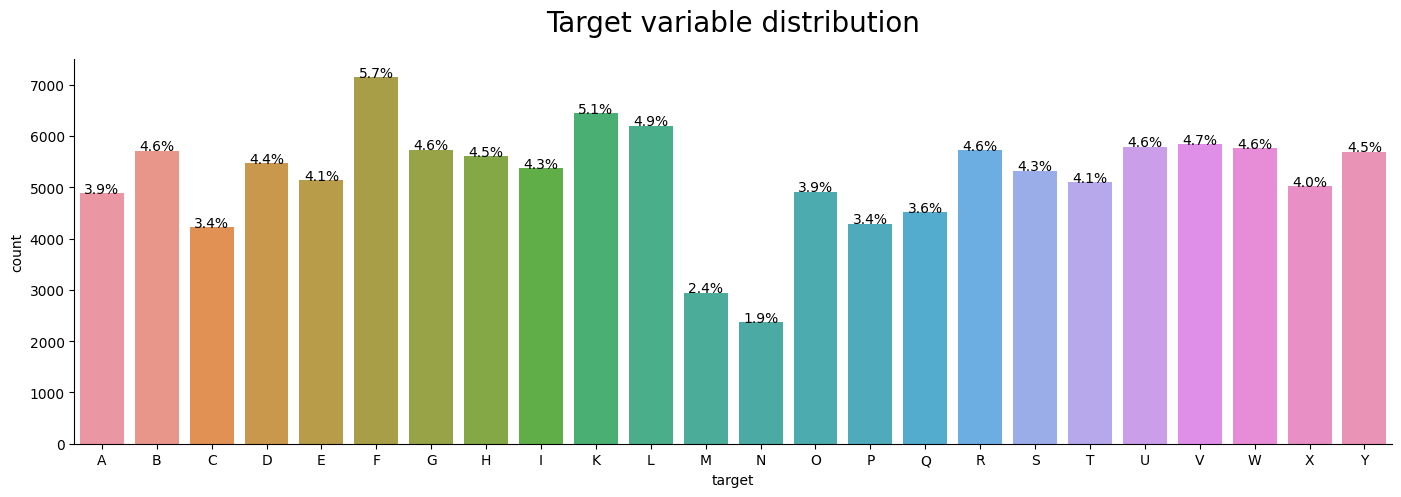

In [8]:
plt.figure(figsize=(17, 5))
total = float(len(df))
ax = sns.countplot(x=df['target'])

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.0,height + 3,'{:1.1f}%'.format((height/total)*100), ha="center")

ax.set_title('Target variable distribution', fontsize=20, y=1.05)
sns.despine(right=True)

#.....................................................


**view summary of dataset**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125262 entries, 0 to 125261
Data columns (total 55 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       125262 non-null  float64
 1   1       125262 non-null  float64
 2   2       125262 non-null  float64
 3   3       125262 non-null  float64
 4   4       125262 non-null  float64
 5   5       125262 non-null  float64
 6   6       125262 non-null  float64
 7   7       125262 non-null  float64
 8   8       125262 non-null  float64
 9   9       125262 non-null  float64
 10  10      125262 non-null  float64
 11  11      125262 non-null  float64
 12  12      125262 non-null  float64
 13  13      125262 non-null  float64
 14  14      125262 non-null  float64
 15  15      125262 non-null  float64
 16  16      125262 non-null  float64
 17  17      125262 non-null  float64
 18  18      125262 non-null  float64
 19  19      125262 non-null  float64
 20  20      125262 non-null  float64
 21  21      12

`We can see that there are no missing values in the data set and all variables are numeric variables except for the target variable.`

**Explore missing values in variables**

In [10]:
df.isnull().sum()

0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         0
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
30        0
31        0
32        0
33        0
34        0
35        0
36        0
37        0
38        0
39        0
40        0
41        0
42        0
43        0
44        0
45        0
46        0
47        0
48        0
49        0
50        0
51        0
52        0
53        0
target    0
dtype: int64

---
### 1.3 **Declare feature vector and target variable**<a class="anchor" id="1.3"></a>

In [11]:
X=df.drop('target',axis=1)
y=df['target']
X.shape,y.shape

#.....................................................


((125262, 54), (125262,))

---
### 1.4 **Split data into separate training and test set**<a class="anchor" id="1.4"></a>


Divide the data set into 70% for training and 30% for testing.

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
print('size train=',len(y_train),'; size test=',len(y_test))

#.....................................................


size train= 87683 ; size test= 37579


---
### 1.5 **Features Scaling**<a class="anchor" id="1.5"></a>


 Standardize features by removing the mean and scaling to unit variance.
 The standard score of a sample x is calculated as:

\begin{equation}
\large
z=\frac {(x-\mu)}{\sigma}
\end{equation}
**where**  $\mu$ is the mean of the training samples,and \$\sigma$ is the standard deviation of the training samples

In [13]:
cols = X_train.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#.....................................................


In [14]:
X_train = pd.DataFrame(X_train, columns=[cols])
X_test = pd.DataFrame(X_test, columns=[cols])

#.....................................................


In [15]:
X_train.sample(5) 

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
5133,-0.284086,-1.760678,-4.488699,-1.007800,0.605374,-0.611567,0.686853,0.443321,0.718237,0.140586,...,1.910487,2.359693,5.349309,4.739576,3.663283,3.850098,3.380193,2.184761,1.910487,1.144553
22656,-0.284086,0.174645,0.578405,-1.490116,-1.367828,-1.686338,-1.321160,-1.297393,-1.492094,-0.872546,...,0.493614,-0.061346,0.377247,0.042641,0.324756,0.831810,0.644832,-0.114507,0.493614,0.189250
5693,-0.284086,0.376264,0.444976,-1.314539,-1.260797,-1.472973,-2.040973,0.303486,-1.897356,-1.232068,...,-1.204198,-0.579698,-0.226524,-0.307282,-0.322927,-0.007111,-0.120630,-1.399891,-1.204198,-1.391483
58309,-0.284086,0.568815,0.510088,1.434167,0.994589,1.525838,0.689625,0.289228,0.700768,-1.259064,...,1.271357,-0.203570,0.206328,-0.252527,0.405552,0.961989,0.655578,0.436557,1.271357,0.898921
28635,-0.284086,0.441249,0.255133,0.632340,0.508154,0.629958,-2.033123,0.462565,-1.923558,-1.273640,...,-0.303661,-1.056882,-0.936576,-1.257435,-0.426174,-0.193356,-0.625186,-0.716584,-0.303661,-0.833296


**Save Scaler**

In [16]:
filename="scaler.sav"
path=model_path+filename
pickle.dump(scaler, open(path, 'wb'))

---
### 1.6 **Encoding Labels**<a class="anchor" id="1.6"></a>
 

In [17]:
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train) # encoding train labels 
encoder.fit(y_test)
y_test = encoder.transform(y_test)   # encoding test labels 

#.....................................................


In [18]:
y_train # encoding train labels 

array([ 2,  3, 10, ...,  0,  3, 23])

In [19]:
y_test #encoding test labels 

array([ 3, 19,  8, ..., 18, 19,  6])

**Save Encoder**

In [20]:
filename="encoder.sav"
path=model_path+filename
pickle.dump(encoder, open(path, 'wb'))

We now have X_train dataset ready to be fed into the classifiers. I will do it as follows.

---
## 2. **Algorithms** <a class="anchor" id="2"></a> 


---
### 2.1 **Support Vector Machines (SVM)** <a class="anchor" id="2.1"></a> 

A support vector machine constructs a hyper-plane or set of hyper-planes in a high or infinite dimensional space, which can be used for classification, regression or other tasks. ......

---
#### 2.1.1 **SVM with default hyperparameters** <a class="anchor" id="2.1.1"></a> 
Default hyperparameter means C=1.0, kernel=rbf and gamma=auto among other parameters.

---


##### 2.1.1.1 **SVM with rbf kernel & C=1.0** <a class="anchor" id="2.1.1.1"></a> 

In [21]:
rbf_svc1=svm.SVC(probability=True)                                        # instantiate classifier with default hyperparameters
rbf_svc1.fit(X_train,y_train)                                             # fit classifier to training set
y_pred=rbf_svc1.predict(X_test)                                           # make predictions on test set 
accur=metrics.accuracy_score(y_test, y_pred)                              # compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'.format(accur))

#.....................................................


Model accuracy score with default hyperparameters: 0.9859


##### 2.1.1.2 **SVM with rbf kernel & C=100.0** <a class="anchor" id="2.1.1.2"></a> 

There may be outliers in our dataset due to different representations of the same signal. So, we should increase the value of C because higher C means fewer outliers. So, I'm going to run an SVM with kernel=rbf and C=100.0.

In [22]:
rbf_svc2=svm.SVC(C=100.0,probability=True)                                # instantiate classifier with rbf kernel and C=100.0
rbf_svc2.fit(X_train,y_train)                                             # fit classifier to training set
y_pred=rbf_svc2.predict(X_test)                                           # make predictions on test set 
accur=metrics.accuracy_score(y_test, y_pred)                              # compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'.format(accur))

#.....................................................


Model accuracy score with rbf kernel and C=100.0 : 0.9951


**`We can see that we obtain a higher accuracy with C=100.0 as higher C means less outliers.
Now, I will further increase the value of C=1000.0 and check accuracy.`**

##### 2.1.1.3 **SVM with rbf kernel & C=1000.0** <a class="anchor" id="2.1.1.3"></a> 

In [23]:
rbf_svc3=svm.SVC(C=1000.0,probability=True)                               # instantiate classifier with rbf kernel and C=1000.0
rbf_svc3.fit(X_train,y_train)                                             # fit classifier to training set
y_pred=rbf_svc3.predict(X_test)                                           # make predictions on test set 
accur=metrics.accuracy_score(y_test, y_pred)                              # compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'.format(accur))

#.....................................................
    

Model accuracy score with rbf kernel and C=1000.0 : 0.9950


**`In this case, we can see that the accuracy had decreased with C=1000.0`**

---
#### 2.1.2 **SVM with linear kernel** <a class="anchor" id="2.1.1"></a> 


---
##### 2.1.2.1 **SVM with linear kernel & C=1.0** <a class="anchor" id="2.1.2.1"></a> 

In [24]:
linear_svc1=svm.SVC(kernel='linear', C=1.0,probability=True)               # instantiate classifier linear kernel and C=1.0
linear_svc1.fit(X_train,y_train)                                           # fit classifier to training set
y_pred=linear_svc1.predict(X_test)                                         # make predictions on test set 
accur=metrics.accuracy_score(y_test, y_pred)                               # compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'.format(accur))

#.....................................................


Model accuracy score with linear kernel and C=1.0 : 0.9760



##### 2.1.2.2 **SVM with linear kernel & C=100.0** <a class="anchor" id="2.1.2.2"></a> 

In [25]:
linear_svc2=svm.SVC(kernel='linear', C=100.0,probability=True)               # instantiate classifier linear kernel and C=100.0
linear_svc2.fit(X_train,y_train)                                             # fit classifier to training set
y_pred=linear_svc2.predict(X_test)                                           # make predictions on test set 
accur=metrics.accuracy_score(y_test, y_pred)                                 # compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'.format(accur))

#.....................................................


Model accuracy score with linear kernel and C=100.0 : 0.9787


##### 2.1.2.3 **SVM with linear kernel & C=1000.0** <a class="anchor" id="2.1.2.3"></a> 

In [26]:
linear_svc3=svm.SVC(kernel='linear', C=1000.0,probability=True)              # instantiate classifier linear kernel and C=1000.0
linear_svc3.fit(X_train,y_train)                                             # fit classifier to training set
y_pred=linear_svc3.predict(X_test)                                           # make predictions on test set 
accur=metrics.accuracy_score(y_test, y_pred)                                 # compute and print accuracy score
print('Model accuracy score with line ar kernel and C=1000.0 : {0:0.4f}'.format(accur))

#.....................................................


Model accuracy score with linear kernel and C=1000.0 : 0.9784


**`We can see that we can obtain higher accuracy with C=100.0 and C=1000.0 as compared to C=1.0.`**

---
#### 2.1.3 **SVM with polynomial kernel** <a class="anchor" id="2.1.3"></a> 

---
##### 2.1.3.1 **SVM with polynomial kernel & C=1.0** <a class="anchor" id="2.1.3.1"></a> 

In [27]:
poly_svc1=svm.SVC(kernel='poly', C=1.0,probability=True)                 # instantiate classifier polynomial kernel and C=1.0
poly_svc1.fit(X_train,y_train)                                           # fit classifier to training set
y_pred=poly_svc1.predict(X_test)                                         # make predictions on test set 
accur=metrics.accuracy_score(y_test, y_pred)                             # compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'.format(accur))

#.....................................................


Model accuracy score with polynomial kernel and C=1.0 : 0.9850


##### 2.1.3.2 **SVM with polynomial kernel & C=100.0** <a class="anchor" id="2.1.3.2"></a> 

In [28]:
poly_svc2=svm.SVC(kernel='poly', C=100.0,probability=True)               # instantiate classifier polynomial kernel and C=100.0
poly_svc2.fit(X_train,y_train)                                           # fit classifier to training set
y_pred=poly_svc2.predict(X_test)                                         # make predictions on test set 
accur=metrics.accuracy_score(y_test, y_pred)                             # compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=100.0 : {0:0.4f}'.format(accur))

#.....................................................


Model accuracy score with polynomial kernel and C=100.0 : 0.9940


##### 2.1.3.3 **SVM with polynomial kernel & C=1000.0** <a class="anchor" id="2.1.3.3"></a> 

In [29]:
poly_svc3=svm.SVC(kernel='poly', C=1000.0,probability=True)              # instantiate classifier polynomial kernel and C=1000.0
poly_svc3.fit(X_train,y_train)                                           # fit classifier to training set
y_pred=poly_svc3.predict(X_test)                                         # make predictions on test set 
accur=metrics.accuracy_score(y_test, y_pred)                             # compute and print accuracy score
print('Model accuracy score with polynomial kernel and C=1000.0 : {0:0.4f}'.format(accur))

#.....................................................


Model accuracy score with polynomial kernel and C=1000.0 : 0.9934


---
 **Check for overfitting and underfitting** 

In [30]:
svm_models={
            "rbf":{
                1:rbf_svc1,
                100:rbf_svc2,
                1000:rbf_svc3
            },
    
            "linear":{
                1:linear_svc1,
                100:linear_svc2,
                1000:linear_svc3
            },
    
            "poly":{
                1:poly_svc1,
                100:poly_svc2,
                1000:poly_svc3
            }
           }

for k in svm_models:
    for m in svm_models[k]:
        print('Training set svm with {} kernel & C= {} score: {:.4f}'.format(k,m,svm_models[k][m].score(X_train, y_train)))
        print('Test set svm with {} kernel & C= {} score: {:.4f}'.format(k,m,svm_models[k][m].score(X_test, y_test)))
        

#.....................................................


Training set svm with rbf kernel & C= 1 score: 0.9866
Test set svm with rbf kernel & C= 1 score: 0.9859
Training set svm with rbf kernel & C= 100 score: 0.9995
Test set svm with rbf kernel & C= 100 score: 0.9951
Training set svm with rbf kernel & C= 1000 score: 0.9998
Test set svm with rbf kernel & C= 1000 score: 0.9950
Training set svm with linear kernel & C= 1 score: 0.9787
Test set svm with linear kernel & C= 1 score: 0.9760
Training set svm with linear kernel & C= 100 score: 0.9835
Test set svm with linear kernel & C= 100 score: 0.9787
Training set svm with linear kernel & C= 1000 score: 0.9839
Test set svm with linear kernel & C= 1000 score: 0.9784
Training set svm with poly kernel & C= 1 score: 0.9873
Test set svm with poly kernel & C= 1 score: 0.9850
Training set svm with poly kernel & C= 100 score: 0.9993
Test set svm with poly kernel & C= 100 score: 0.9940
Training set svm with poly kernel & C= 1000 score: 0.9998
Test set svm with poly kernel & C= 1000 score: 0.9934


**The accuracy of the training set and the test set's accuracy in each kernel are quite similar. Therefore, there is no question of overfitting.** 

Undoubtedly, we will choose the best hyperparameters  that achieves higher accuracy in the test data and also the training data, which is less prone to overfitting and underfitting.

It is hyperparameters kernel=rbf & C= 100, The training and testing accuracy of these parameters is 0.9995,0.9951.

**`We will take care of these parameters in the rest of the steps`**

---
### Comments


We get maximum accuracy with `rbf` and `polynomial` kernel with C=100.0. and the accuracy is 0.9951,0.9940. Based on the above analysis we can conclude that our classification model accuracy is very good. Our model is doing a very good job in terms of predicting the class labels.


But this is not true. Here, we have some classes in the data set that are unbalanced as (M,N) as shown earlier when we presented the distribution of classes in the data set. The problem is that accuracy is an insufficient measure of predictive performance in the unbalanced dataset problem.


So, we must explore alternative metrices that provide better guidance in selecting models. In particular, we would like to know the underlying distribution of values and the type of errors our classifer is making. 


One such metric to analyze the model performance in imbalanced classes problem is `Confusion matrix`.

---
### Confusion matrix



A confusion matrix is a tool for summarizing the performance of a classification algorithm. A confusion matrix will give us a clear picture of classification model performance and the types of errors produced by the model. It gives us a summary of correct and incorrect predictions broken down by each category. The summary is represented in a tabular form.


Four types of outcomes are possible while evaluating a classification model performance. These four outcomes are described below:-


**True Positives (TP)** – True Positives occur when we predict an observation belongs to a certain class and the observation actually belongs to that class.


**True Negatives (TN)** – True Negatives occur when we predict an observation does not belong to a certain class and the observation actually does not belong to that class.


**False Positives (FP)** – False Positives occur when we predict an observation belongs to a    certain class but the observation actually does not belong to that class. This type of error is called **Type I error.**



**False Negatives (FN)** – False Negatives occur when we predict an observation does not belong to a certain class but the observation actually belongs to that class. This is a very serious error and it is called **Type II error.**



These four outcomes are summarized in a confusion matrix given below.


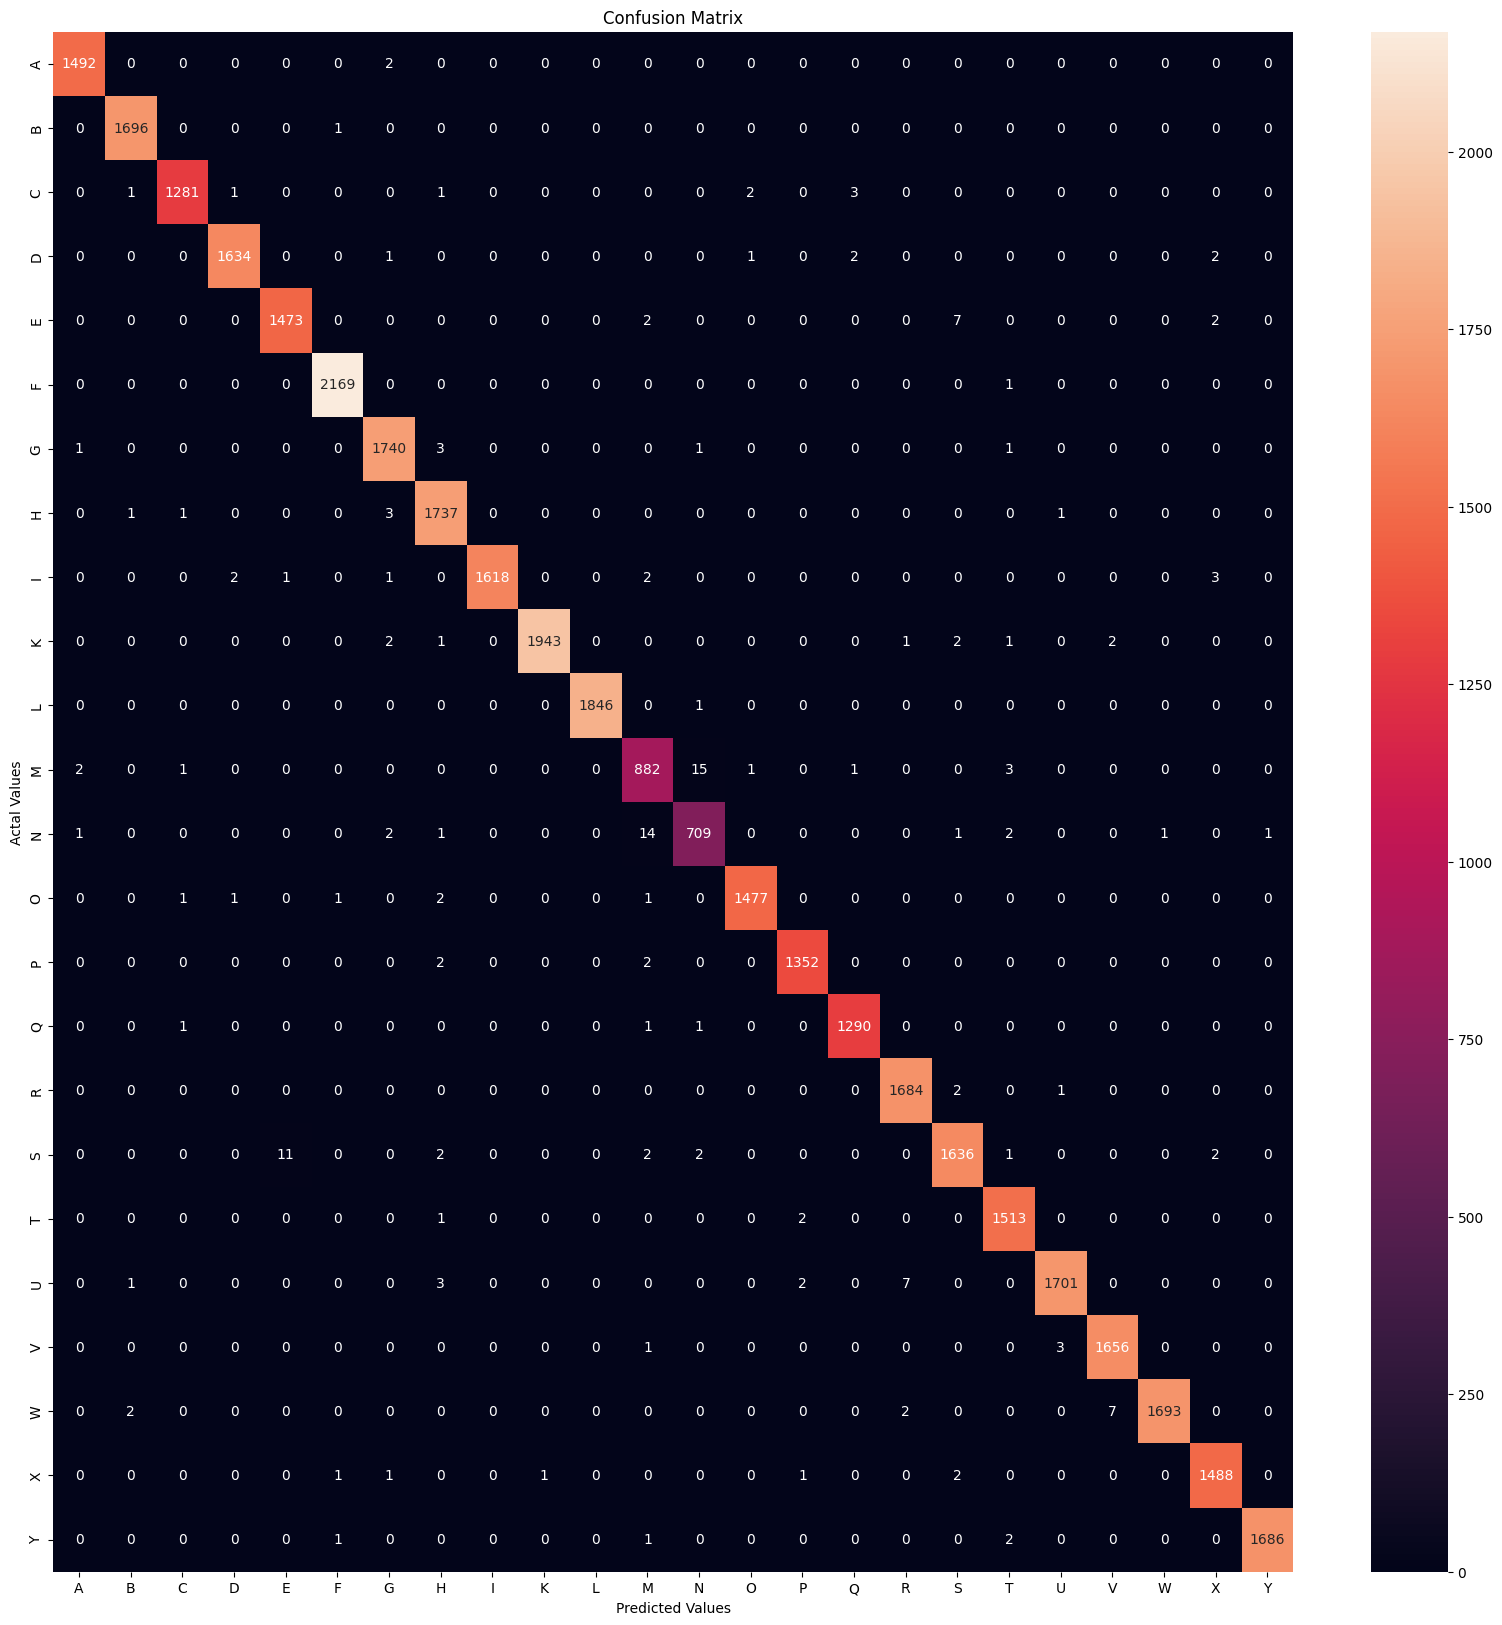

In [31]:
cm = metrics.confusion_matrix(y_test, rbf_svc2.predict(X_test))
ylable=[chr(i) for i in range(65,91)]
ylable.remove('Z')
ylable.remove('J')
cm_df = pd.DataFrame(cm,index=ylable,columns=ylable)

plt.figure(figsize=(20,20))


sns.heatmap(cm_df, annot=True,fmt='.0f')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

#.....................................................


---
### Classification Report

Classification report is another way to evaluate the classification model performance. It displays the precision, recall, f1 and support scores for the model


In [32]:
print(metrics.classification_report(encoder.inverse_transform(y_test), encoder.inverse_transform(rbf_svc2.predict(X_test))))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00      1494
           B       1.00      1.00      1.00      1697
           C       1.00      0.99      1.00      1289
           D       1.00      1.00      1.00      1640
           E       0.99      0.99      0.99      1484
           F       1.00      1.00      1.00      2170
           G       0.99      1.00      0.99      1746
           H       0.99      1.00      0.99      1743
           I       1.00      0.99      1.00      1627
           K       1.00      1.00      1.00      1952
           L       1.00      1.00      1.00      1847
           M       0.97      0.97      0.97       905
           N       0.97      0.97      0.97       732
           O       1.00      1.00      1.00      1483
           P       1.00      1.00      1.00      1356
           Q       1.00      1.00      1.00      1293
           R       0.99      1.00      1.00      1687
           S       0.99    

---
### Stratified k-fold Cross Validation with shuffle split

k-fold cross-validation is a very useful technique to evaluate model performance. But, it fails here because we have a imbalnced dataset. So, in the case of imbalanced dataset, I will use another technique to evaluate model performance. It is called `stratified k-fold cross-validation`.


In `stratified k-fold cross-validation`, we split the data such that the proportions between classes are the same in each fold as they are in the whole dataset.


Moreover, I will shuffle the data before splitting because shuffling yields much better result.

#### Stratified k-Fold Cross Validation with shuffle split with  rbf kernel & c=100

In [33]:
kfold=KFold(n_splits=5, shuffle=True, random_state=0)
rbf_svc=svm.SVC(kernel='rbf',C=100.0)
rbf_scores = cross_val_score(rbf_svc, X, y, cv=kfold)

#.....................................................


cross-validation scores with rbf kernel & C=100.0

In [34]:
print('Stratified cross-validation scores with rbf kernel & C=100.0 :\n\n{}'.format(rbf_scores))

Stratified cross-validation scores with rbf kernel & C=100.0 :

[0.99305472 0.99225642 0.99173719 0.99221619 0.99041993]


average cross-validation score with rbf kernel & C=100.0

In [35]:
print('Average stratified cross-validation score with rbf & C=100.0 :{:.4f}'.format(rbf_scores.mean()))

Average stratified cross-validation score with rbf & C=100.0 :0.9919


---
### Model Save 

In [36]:
filename="svm_rbf_c_100.sav"
path=model_path+filename
pickle.dump(rbf_svc2, open(path, 'wb'))

#.....................................................


---
## Results and conclusion 


There are outliers in our dataset. So, as I increase the value of C to limit fewer outliers, the accuracy increased. This is true with different kinds of kernels.

get maximum accuracy `rbf` and `polynomial` kernel with C=100.0 and the accuracy is0.9951,0.9940. So, we can conclude that our model is doing a very good job in terms of predicting the class labels. But, this is not true. Here, we have an imbalanced dataset. Accuracy is an inadequate measure for quantifying predictive performance in the imbalanced dataset problem. So, we must explore confusion matrix that provide better guidance in selecting models.

I obtain higher average stratified k-fold cross-validation score of `0.9919` with rbf kernel but the model accuracy is `0.9951`.
So, stratified cross-validation technique does not help to improve the model performance.

---
### 2.2 **Multlayer Perceptron (MLP)** <a class="anchor" id="2.2"></a> 

Multlayer Perceptron. ......

---
#### 2.2.1 **A function that divides data into 3 groups.** <a class="anchor" id="2.2.1"></a> 


Input(Is Flipe Hand,Dirction Hand) 

Input(Conners Fingers)               

Input(Coners Thume And All Fingers)

---------------------------------------


In [37]:
def DataSet_Group(data):
    group1 = data[:,0:2]
    group2 = data[:,2:18]
    group3 = data[:,18:]
    return [group1,group2,group3]

#.....................................................

---
#### 2.2.2 **A function that converts groups into 3D dimensions.** <a class="anchor" id="2.2.2"></a> 


In [38]:
def Convert_3DGroup(groups,axis=2):
    _3Dgroups=[]
    for i in range(len(groups)):
        _3Dgroups.append(np.expand_dims(groups[i],axis=axis))
    return _3Dgroups

#.....................................................

---
#### 2.2.3 **A function that creates input layers according to divided groups.** <a class="anchor" id="2.2.3"></a> 


In [39]:
def Input_layers_3Dgroups(_3Dgroups):
    input_3Dgroups=[]
    for i in range(len(_3Dgroups)):
        input_3Dgroups.append(Input(shape=(_3Dgroups[i].shape[1],_3Dgroups[i].shape[2])))
    return input_3Dgroups

#.....................................................


Dividing the training and test data into groups, and converting the dimensions of each group into three dimensions.

In [40]:
training_dataset_groups=DataSet_Group(X_train.values)
testing_dataset_groups=DataSet_Group(X_test.values)

training_dataset_3Dgroups=Convert_3DGroup(training_dataset_groups,axis=2)
testing_dataset_3Dgroups=Convert_3DGroup(testing_dataset_groups,axis=2)

print("len [training_dataset_groups]=",len(training_dataset_groups))
print("len [testing_dataset_groups]=",len(testing_dataset_groups))
print("len [training_dataset_3Dgroups]=",len(training_dataset_3Dgroups))
print("len [testing_dataset_3Dgroups]=",len(testing_dataset_3Dgroups))

#........................


len [training_dataset_groups]= 3
len [testing_dataset_groups]= 3
len [training_dataset_3Dgroups]= 3
len [testing_dataset_3Dgroups]= 3



Configure MlP Input Layers.

In [41]:
training_Input_3Dgroups=Input_layers_3Dgroups(training_dataset_3Dgroups)
print("number Input layers [training_Input_3Dgroups] =",len(training_Input_3Dgroups))

number Input layers [training_Input_3Dgroups] = 3


---
#### 2.2.4 **Categorize the Labels.** <a class="anchor" id="2.2.4"></a>

In [42]:
y_train =to_categorical(y_train, 24)
y_test =to_categorical(y_test, 24)
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

---
#### 2.2.5 **Create Model.** <a class="anchor" id="2.2.5"></a>


In [43]:
def Create_Model(training_dataset_3Dgroups,numclass=24):
    
    layer_1=Dense(4,activation='relu',kernel_initializer='glorot_uniform',
                  input_shape=training_dataset_3Dgroups[0].shape[1:3])(training_Input_3Dgroups[0])
    output_1 = Flatten()(layer_1)
    
    #.............................
    
    layer_2=Dense(4,activation='relu',kernel_initializer='glorot_uniform',
                  input_shape=training_dataset_3Dgroups[1].shape[1:3])(training_Input_3Dgroups[1])
    output_2 = Flatten()(layer_2)
    
    #.............................
    
    layer_3=Dense(4,activation='relu',kernel_initializer='glorot_uniform',
                  input_shape=training_dataset_3Dgroups[2].shape[1:3])(training_Input_3Dgroups[2])
    output_3 = Flatten()(layer_3)
    
    #.............................
    
    mergen=Concatenate(name='concatenate')([output_1, output_2, output_3])
    
    #.............................
    
    layer_4=Dense(30,activation='relu')(mergen)
    
    #.............................
    
    layer_5=Dense(numclass,activation='softmax')(layer_4)
    
    #.............................
    model = Model(inputs=training_Input_3Dgroups, outputs=[layer_5])
    
    
    return model
                                                                    

#.................................................................
            

In [44]:
model=Create_Model(training_dataset_3Dgroups,numclass=24)

View a summary of the structure of the MLP model.

In [45]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 2, 1)]       0           []                               
                                                                                                  
 input_2 (InputLayer)           [(None, 16, 1)]      0           []                               
                                                                                                  
 input_3 (InputLayer)           [(None, 36, 1)]      0           []                               
                                                                                                  
 dense (Dense)                  (None, 2, 4)         8           ['input_1[0][0]']                
                                                                                              


View the structure of the MLP model.

In [46]:
plot_model(model,'MLP_Model_Img.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


---
#### 2.2.6 **MLP Model Training.** <a class="anchor" id="2.2.6"></a>


In [47]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer ='Adam')

hist = model.fit(training_dataset_3Dgroups,y_train, epochs =50,verbose =1,
                 validation_data=(testing_dataset_3Dgroups,y_test))

Epoch 1/50
2741/2741 [==============================] - 4s 1ms/step - loss: 0.3695 - accuracy: 0.9134 - val_loss: 0.1590 - val_accuracy: 0.9625
Epoch 2/50
2741/2741 [==============================] - 3s 1ms/step - loss: 0.1492 - accuracy: 0.9638 - val_loss: 0.1328 - val_accuracy: 0.9663
Epoch 3/50
2741/2741 [==============================] - 3s 1ms/step - loss: 0.1260 - accuracy: 0.9684 - val_loss: 0.1202 - val_accuracy: 0.9685
Epoch 4/50
2741/2741 [==============================] - 3s 1ms/step - loss: 0.1137 - accuracy: 0.9715 - val_loss: 0.1008 - val_accuracy: 0.9750
Epoch 5/50
2741/2741 [==============================] - 3s 1ms/step - loss: 0.1045 - accuracy: 0.9735 - val_loss: 0.1025 - val_accuracy: 0.9733
Epoch 6/50
2741/2741 [==============================] - 3s 1ms/step - loss: 0.0985 - accuracy: 0.9749 - val_loss: 0.1016 - val_accuracy: 0.9736
Epoch 7/50
2741/2741 [==============================] - 3s 1ms/step - loss: 0.0934 - accuracy: 0.9759 - val_loss: 0.0922 - val_accuracy:

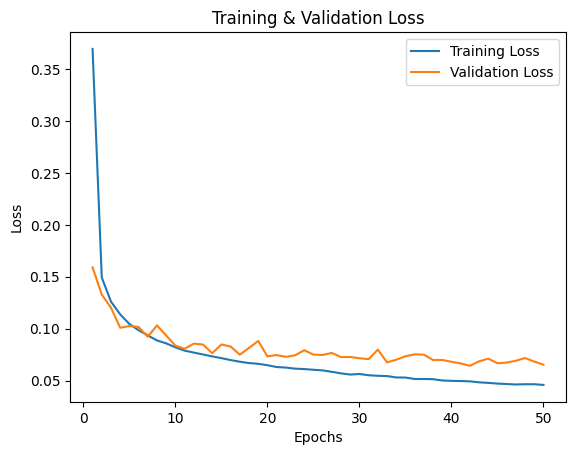

In [48]:
loss_values = hist.history['loss']
val_loss_values = hist.history['val_loss'] 
epochs = range(1, len(loss_values) + 1)

# Plot the loss vs Epochs
plt.plot(epochs, loss_values)
plt.plot(epochs, val_loss_values)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss','Validation Loss'])
plt.show()

---
#### 2.2.7 **Evaluating the model.** <a class="anchor" id="2.2.7"></a>


In [49]:
score = model.evaluate(testing_dataset_3Dgroups, y_test,verbose=1)
print(score[1])

1175/1175 [==============================] - 1s 790us/step - loss: 0.0652 - accuracy: 0.9844
0.9844328165054321


---
### Model Save 

In [50]:
filename="mlp_categorical_crossentropy_50"
path=model_path+filename
model.save(path+'.h5')
pickle.dump(rbf_svc2, open(path+'.sav', 'wb'))

#.....................................................